## Seismic wavefield visualization and comparison
### D. Li
### 7 Feb. 2024


In [1]:
# load modulus
import numpy as np
import seissolxdmf
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt

import seaborn as sn


Fontconfig warning: ignoring UTF-8: not a valid region tag


In [3]:
import matplotlib
from matplotlib.ticker import MultipleLocator
print(matplotlib.style.available)

# matplotlib.rc('font', **font)
matplotlib.style.use('seaborn-talk') # Lovely plotting style
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['legend.fontsize'] = 14
# matplotlib.rcParams['xtick.direction'] = 'in'
# matplotlib.rcParams['ytick.direction'] = 'in'
# plt.rcParams['xtick.major.size'] = 5.0
# plt.rcParams['xtick.minor.size'] = 3.0
# plt.rcParams['ytick.major.size'] = 5.0
# plt.rcParams['ytick.minor.size'] = 3.0

# plt.rcParams['axes.linewidth'] = 1.2
# plt.rcParams['legend.handlelength'] = 3.0


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
# load seissol out put data and extract station
# load GM data and compare station-to-station


def find_surf_site(stafolder, stafile, xdmfFilename,modelname):
    
    staFile = open(stafolder  + stafile ,'r')
    
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    # Number of cells
    nElements = sx.ReadNElements()
    # Read time step
    dt = sx.ReadTimeStep()
    # Read number of time steps
    ndt = sx.ReadNdt()
    # load geometry array as a numpy array of shape ((nodes, 3))
    surfxyz= sx.ReadGeometry()
    # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
    # The connectivity array gives for each cell a list of vertex ids.
    connect = sx.ReadConnect()
    # horizontal comp. and vertical
    u = sx.ReadData('v1')
    v = sx.ReadData('v2')
    w = sx.ReadData('v3')
    print('(ndt,nelemenet)= ', u.shape)
    print('time interval=', dt)
    
    sitexyz = np.loadtxt(staFile)
    # coordinates convert if necessary
    # staxyz = pyproj.transform(myproj,lla,gmData.long,gmData.lat,radians=False)

    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.
    Receiver = np.array(sitexyz)
    
    # Receiver = Receiver.transpose()
    
    # search for nearest points of stations
    tree = spatial.KDTree(centers)
    dist, ids = tree.query(Receiver)
    
    FidReceiversnew =  stafolder + modelname + '/'+ 'sitemesh_xyz.txt'
    fout = open(FidReceiversnew,'w')
    fout1 = open(stafolder + modelname + '/'+'sitemesh_number.txt','w')
    
    for k in range(sitexyz[:,0].size):
        #newrec = find_nearest_vector(centers, rec)
        newrec = centers[ids[k]]
        print(k,ids[k])
        fout.write("%f %f %f\n" %(newrec[0],newrec[1],newrec[2]))
        fout1.write("%d %f\n" %(ids[k],dist[k]))

        data = np.array([u[:,ids[k]],v[:,ids[k]],w[:,ids[k]]])
        np.savetxt(stafolder + modelname + '/sta'+ str(k)+'.txt',data.transpose())
        
    fout.close()
    fout1.close()

In [47]:
# extract station output
# seissolxdmf.seissolxdmf.ReadData?

# sx = seissolxdmf.seissolxdmf(xdmfFilename)
# # Number of cells
# nElements = sx.ReadNElements()
# # Read time step
# dt = sx.ReadTimeStep()
# # Read number of time steps
# ndt = sx.ReadNdt()
# # load geometry array as a numpy array of shape ((nodes, 3))
# surfxyz= sx.ReadGeometry()
# # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
# # The connectivity array gives for each cell a list of vertex ids.
# connect = sx.ReadConnect()
# # horizontal comp. and vertical
# u = sx.ReadData('v1')
# v = sx.ReadData('v2')
# w = sx.ReadData('v3')
# print(u.shape)

# data = np.array([u[:,4],v[:,4],w[:,4]])
# print(data.shape,data.transpose().shape)

(3, 80) (80, 3)


In [39]:
# load surface data and check station

xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
modelname = 'test3Dv4-5hz'

# xdmffolder = '/Volumes/AvalonPark/output/'
# modelname = 'test3Dv2-2hz'

xdmffolder = '/Users/duoli/Library/Mobile Documents/com~apple~CloudDocs/NSHM/Model_kinematic/pointsource/'
modelname = 'test2'

xdmfFilename = xdmffolder + modelname+'-surface.xdmf'

stafolder = '/Users/duoli/Library/Mobile Documents/com~apple~CloudDocs/NSHM/Model_kinematic/'
stafile  = 'station_xyz.txt'

# find_surf_site(stafolder, stafile, xdmfFilename,modelname)


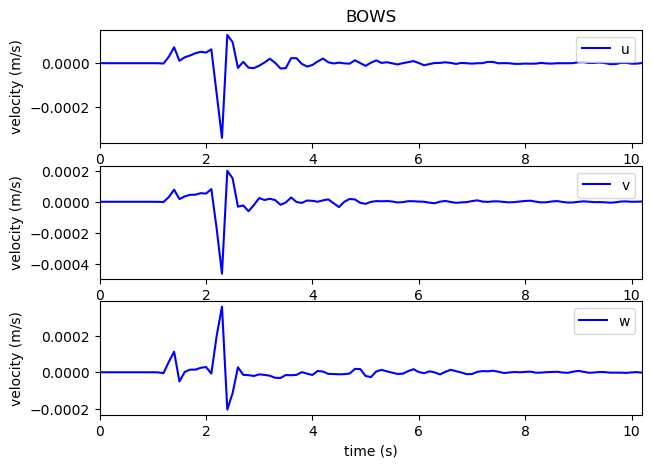

In [91]:
#site_num_file = stafolder + './sitemesh_number.txt')
# plot waveform

# xdmffolder = '/Volumes/AvalonPark/output/'
# modelname = 'test3Dv2-2hz'



nsite = 30

nstep = 252
dt = 0.2 # data sample rate

tt = np.linspace(0,nstep*dt-dt,nstep)


for k in range(1):
    
    fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(7,5))
    
    wfname = stafolder + modelname + '/sta'+ str(k)+ '.txt'
    wf = np.loadtxt(wfname)
    ax[0].plot(tt,wf[:,0],'-b',label='u')
    ax[0].legend()
    ax[0].set_title(siteTable.sta[k])
    ax[0].set_ylabel('velocity (m/s)')
    ax[0].set(xlim=(0,10.2))

    ax[1].plot(tt,wf[:,1],'-b',label='v')
    ax[1].legend()
    ax[1].set_ylabel('velocity (m/s)')
    ax[1].set(xlim=(0,10.2))

    ax[2].plot(tt,wf[:,2],'-b',label='w')
    ax[2].legend()
    ax[2].set_xlabel('time (s)')
    ax[2].set_ylabel('velocity (m/s)')
    ax[2].set(xlim=(0,10.2))
    
    plt.savefig('waveform'+str(k)+'.png',dpi=150)
    
    

10020.0


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


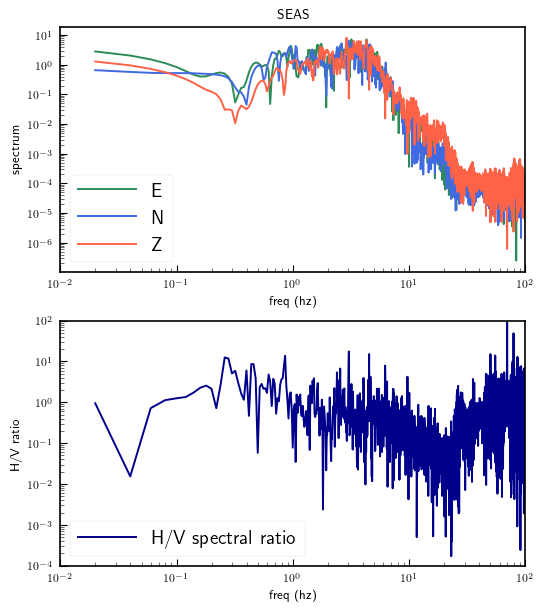

In [125]:
## plot spectrium for each station

xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
modelname = 'test3Dv4-5hz'

nsite = 30
duration = 50.1
SAMPLE_RATE = 1/0.005 # data sample rate

## data around the basin


N = duration * SAMPLE_RATE
Nt = int(np.round(N/2,1)-1)
print(N)

from scipy.fft import fft, fftfreq

folder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/'
# filename = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/test3Dv4-5hz-receiver-00020-00009.dat'
filename = folder + '/test3Dv4-5hz-receiver-00020-00009.dat'

filename = folder + 'test3Dv4-5hz-receiver-00016-00011.dat'
nsta = 16

t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)
yf1 = fft(vx)
yf2 = fft(vy)
yf3 = fft(vz)
xf = fftfreq(int(N),1/SAMPLE_RATE)

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
    
ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='E')
ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='N')
ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
ax[0].set(xlim=(0.01,100))
ax[0].set_xscale('log',base=10)
ax[0].set_yscale('log',base=10)
ax[0].set_title(siteTable.sta[nsta-1]) # index change
    
# plt.xlim(0,5)
ax[0].set_ylabel('spectrum')
ax[0].set_xlabel('freq (hz)')

ax[0].legend()

ax[1].plot((xf[1:Nt]), np.sqrt(yf1[1:Nt]**2 + yf2[1:Nt]**2)/np.sqrt(2)/np.abs(yf3)[1:Nt] ,'-',color='darkblue',label='H/V spectral ratio')

ax[1].set(xlim=(0.01,100),ylim=(1e-4,100))
ax[1].set_ylabel('H/V ratio')
ax[1].set_xlabel('freq (hz)')
ax[1].set_xscale('log',base=10)
ax[1].set_yscale('log',base=10)

ax[1].legend()

fftname = './FFT-'+ siteTable.sta[nsta-1]+ '.png'  # index change
plt.savefig(fftname,dpi=150)

# for k in [1,2,3,5,6]:
#     # Number of samples in normalized_tone
#     wfname = stafolder + modelname + '/'+ str(k)+ '.txt'
#     wf = np.loadtxt(wfname)
    
#     yf1 = fft(wf[:,0])
#     yf2 = fft(wf[:,1])
#     yf3 = fft(wf[:,2])
    
#     xf = fftfreq(N, 1 / SAMPLE_RATE)
    
#     plt.figure(figsize=(6,3))
    
#     plt.plot(xf[:Nt], np.abs(yf1)[:Nt],'-',color='seagreen',label='E')
#     plt.plot(xf[:Nt], np.abs(yf2)[:Nt],'-',color='royalblue',label='N')
#     plt.plot(xf[:Nt], np.abs(yf3)[:Nt],'-',color='tomato',label='Z')
#     # plt.xlim(0,5)
#     plt.ylabel('spectrum')
    
#     plt.legend()
#     fftname = stafolder + modelname + '/FFT-'+ siteTable.sta[k]+ '.png'
#     plt.savefig(fftname,dpi=150)

In [5]:
# import instaseis and dependency
import numpy as np

from obspy import read
# from obspy.taup import TauPyModel as taup
# from obspy.taup.taup_geo import calc_dist_azi as calc_dist_azi

from obspy.clients.fdsn import Client
# from obspy.signal.cross_correlation import correlate
# from obspy.signal.cross_correlation import xcorr_max


# plot regional seismic network and compare seismograph
from obspy.clients.fdsn import Client
# from obspy.geodetics import gps2dist_azimuth
from obspy import UTCDateTime
# from obspy.signal.rotate import rotate2zne

from obspy import read,read_inventory
# from obspy.signal.cross_correlation import xcorr
# from obspy.signal.rotate import rotate_ne_rt
from obspy import Trace, Stream

In [6]:
import pandas as pd
# rootfolder = '/home/duol/Documents/NSHM_SRM/'
rootfolder = '/Users/duoli/Documents/NSHM_SRM/'
rootfolder = '/scale_wlg_nobackup/filesets/nobackup/gns04005/daisy/NSHM/'

siteTable = pd.read_csv(rootfolder + 'Model_kinematic/site_subtable2.csv')
# # print(siteTable['sta'])

df_d= siteTable.query('site_class=="D"')
df_c= siteTable.query('site_class=="C"')
df_b= siteTable.query('site_class=="B"')

print(df_d['Vs30'])

3     267
4     278
5     300
9     240
10    500
14    222
16    212
18    330
19    256
20    274
24    190
28    200
31    210
35    190
37    190
39    246
41    209
43    233
45    510
46    292
47    271
49    390
50    286
55    265
56    229
59    230
Name: Vs30, dtype: int64


In [ ]:
print(df_d['sta'])

In [28]:
from obspy.clients.fdsn import Client

client  = Client("GEONET")

# longitude = siteTable.lon[0]
# latitude = siteTable.lat[0]

longitude,latitude = 174.9440964 ,-41.24207703                                                                                                                                
                                                                                                                    
# startT = '2009-08-27 00:05:00.000'
# endT = '2009-08-27 23:00:00.000'


startT = '2009-10-10 00:00:00.000'
endT = '2009-10-10 23:59:00.000'

startT = '2011-12-07 00:00:00.000'
endT = '2011-12-07 23:59:00.000'

# startT = '2012-05-05 00:00:00.000'
# endT = '2012-05-05 23:59:00.000'

cat = client.get_events(latitude=latitude,longitude=longitude,maxradius=0.4,minmagnitude=3.3, starttime=startT,endtime=endT) # Y
print(cat)

# cat.plot(projection="local")

1 Event(s) in Catalog:
2011-12-07T21:16:41.958000Z | -41.150, +174.731 | 3.8  Mw | manual


In [29]:
event = cat[0]
start = event.origins[0].time

inv = client.get_stations(network='NZ',channel='HN?',maxradius=0.4,latitude=latitude,longitude=longitude,level="response")

st_data = Stream()

for network in inv:
    for station in network:
        try:
            st = client.get_waveforms(network.code, station.code, "*", "*", start, start + 40)
            st.remove_response(inventory=inv.select(station=station.code),output='ACC')
            st.detrend('simple')
            st.rotate(method="->ZNE", inventory=inv.select(station=station.code))
            st_data += st
     
        except:
            pass

print(st_data.select(channel='HNE'))

# st.remove_response(inventory=inv,output='acc') 


/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/obspy/io/stationxml/core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


37 Trace(s) in Stream:

NZ.ARKS.20.HNE | 2011-12-07T21:16:41.960000Z - 2011-12-07T21:17:09.995000Z | 200.0 Hz, 5608 samples
...
(35 other traces)
...
NZ.WNKS.20.HNE | 2011-12-07T21:16:41.960000Z - 2011-12-07T21:17:10.995000Z | 200.0 Hz, 5808 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [30]:
# filter and band of freq of the synthetic recording

f1 = 0.01
f2 = 4.0 

# st_syn1 = st_syn.copy()
# st_syn1.differentiate() ## important
# st_syn1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)

## filter of real recording
st_data1 = st_data.copy()
st_data1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)

# save data to local disc
eventname = '20111207'
st_data1.write(rootfolder + 'Data/'+'p'+ eventname+  '.mseed', format='MSEED')

# sta = 'TEPS'
# print(st_syn.select(station=sta)[0].stats)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


In [40]:
eventname = '20091010'

st_data1 = read(rootfolder + 'Data/'+'p'+ eventname+  '.mseed', format='MSEED')
st_syn1 = read(rootfolder + 'Syn/'+'p'+ eventname+  '-4hz.mseed', format='MSEED')

print(st_data1, st_syn1)

81 Trace(s) in Stream:

NZ.ARKS.20.HNZ | 2009-10-10T05:02:35.545000Z - 2009-10-10T05:03:15.545000Z | 200.0 Hz, 8001 samples
...
(79 other traces)
...
NZ.WNKS.20.HNE | 2009-10-10T05:02:35.545000Z - 2009-10-10T05:03:06.995000Z | 200.0 Hz, 6291 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces] 153 Trace(s) in Stream:

Se.ARKS..BNE | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:30.100000Z | 200.0 Hz, 6021 samples
...
(151 other traces)
...
Se.WTYS..BNZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:30.100000Z | 200.0 Hz, 6021 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


/tmp/ipykernel_181494/4201680187.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 8))


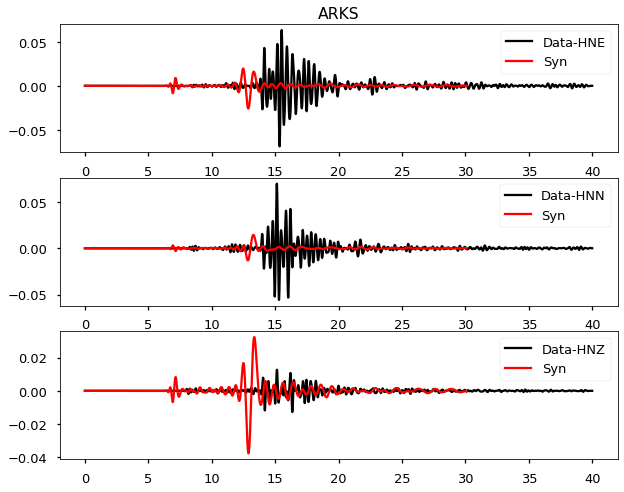

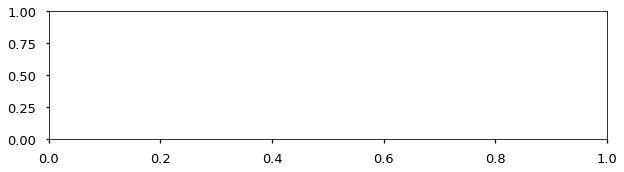

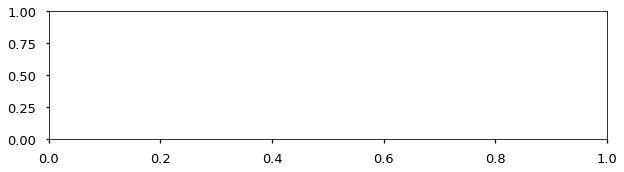

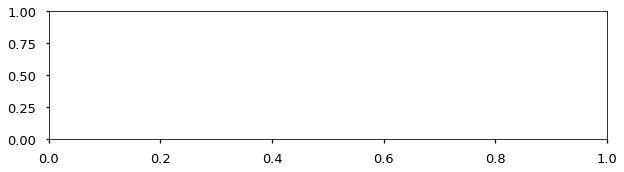

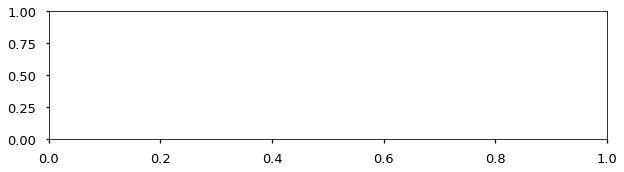

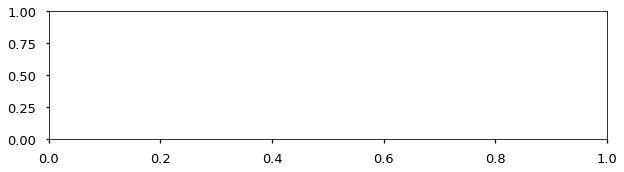

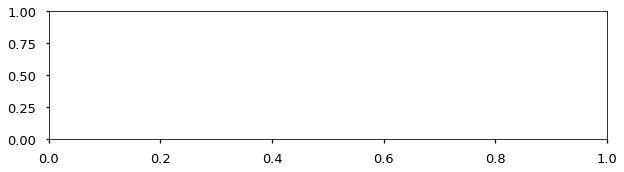

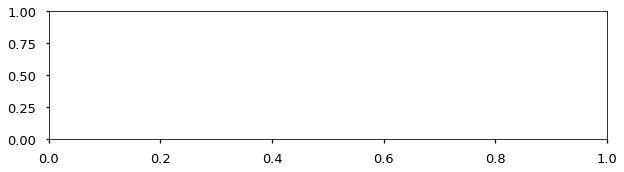

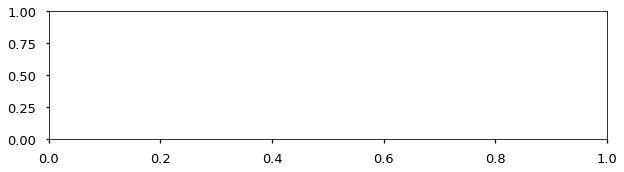

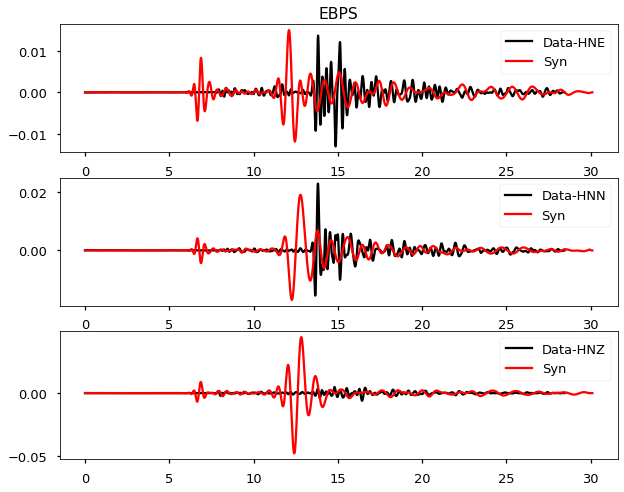

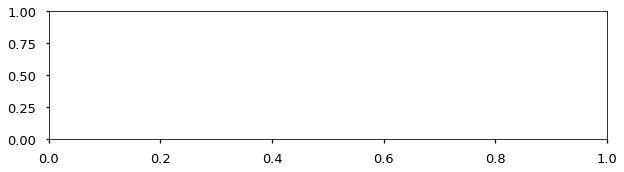

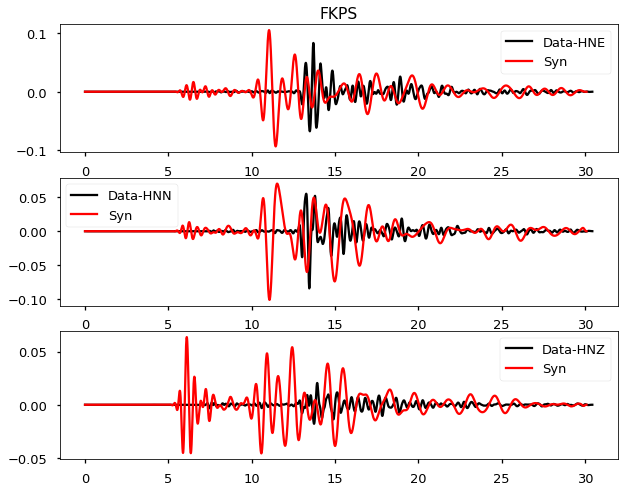

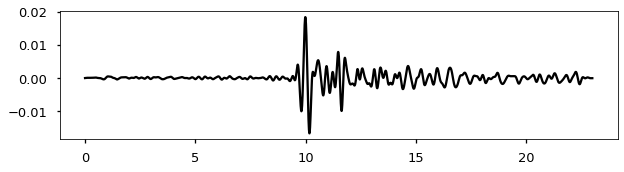

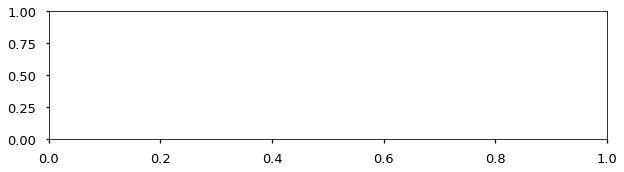

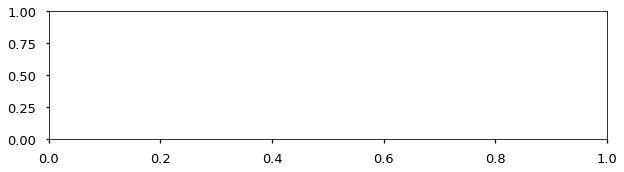

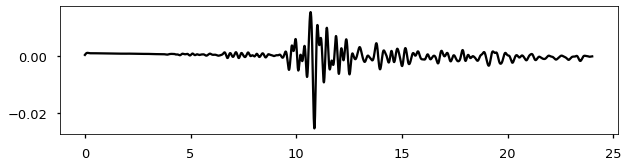

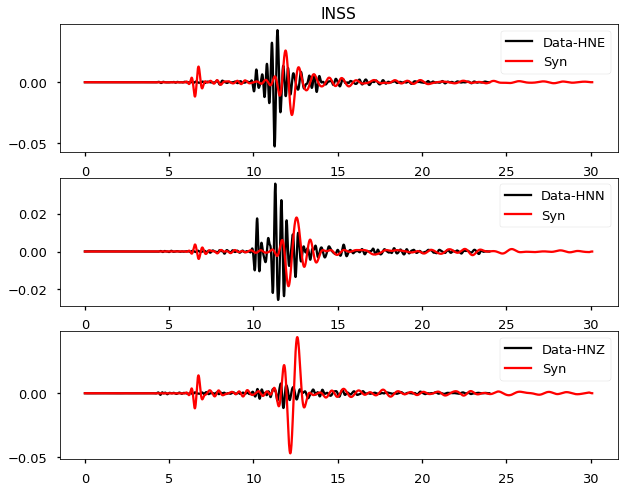

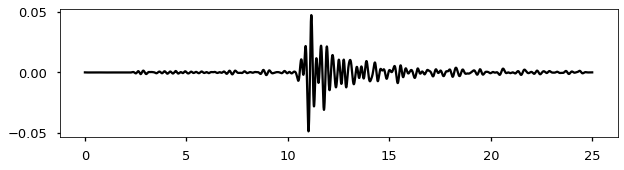

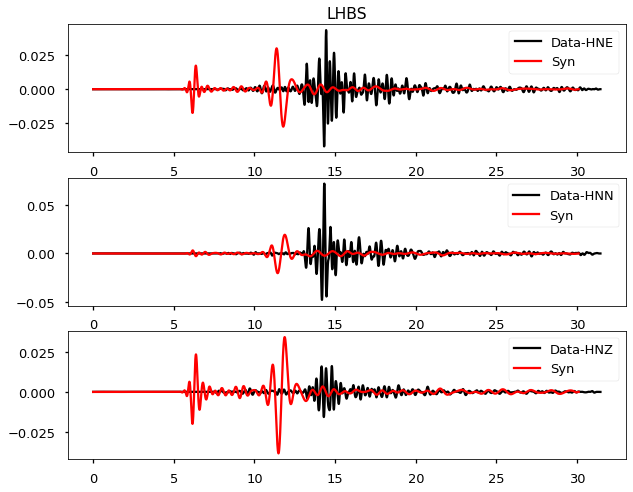

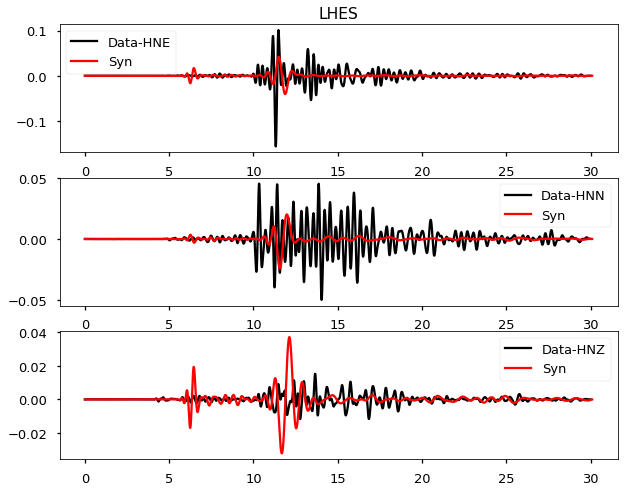

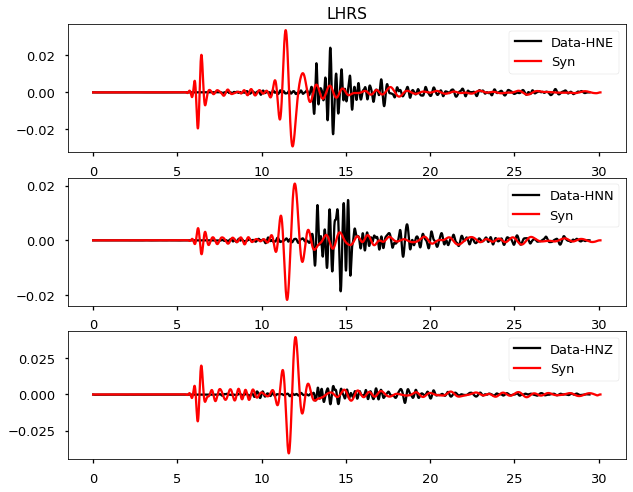

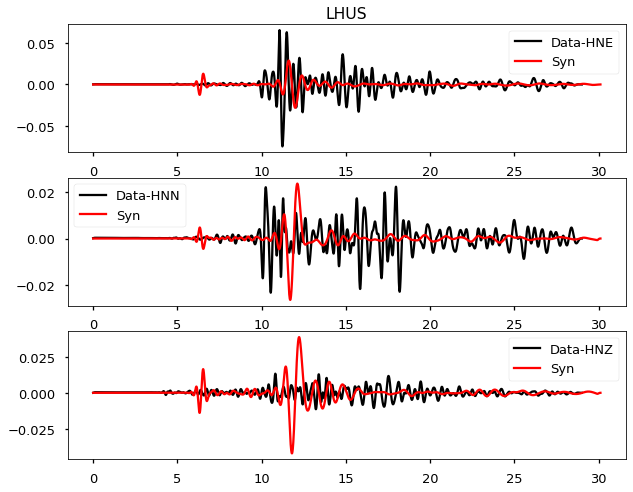

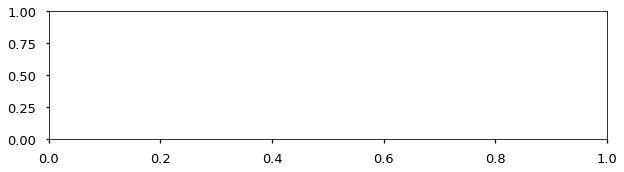

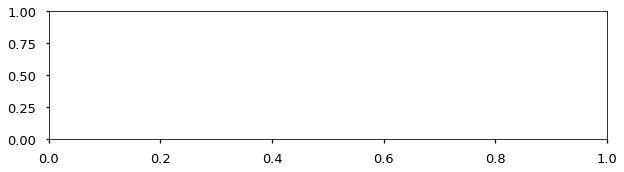

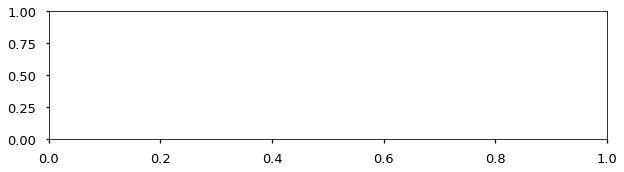

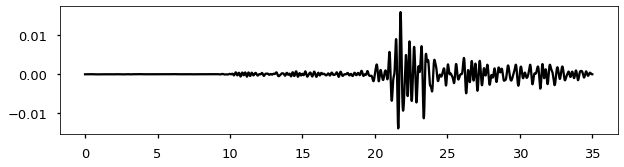

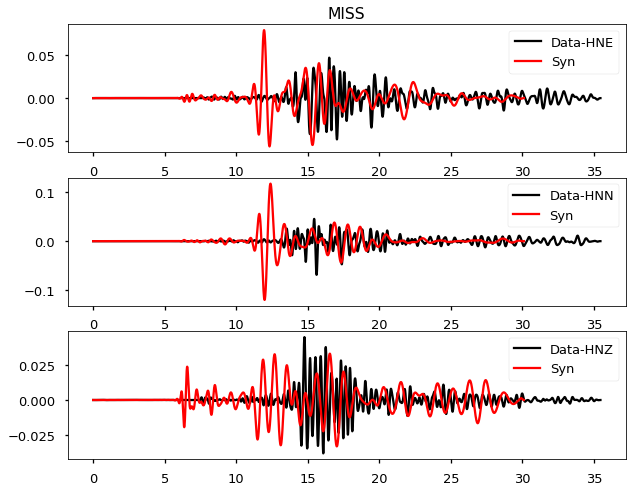

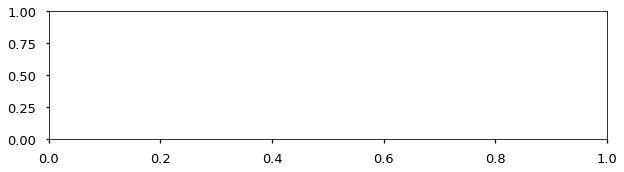

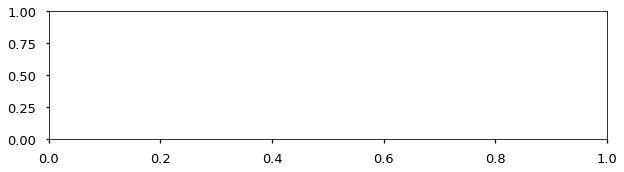

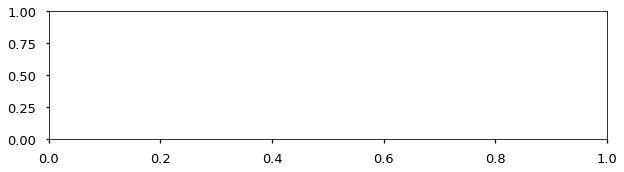

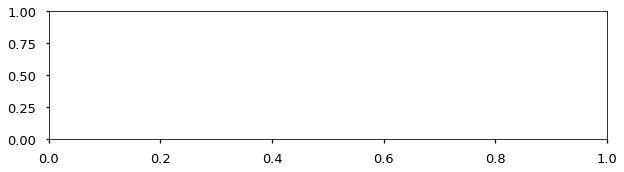

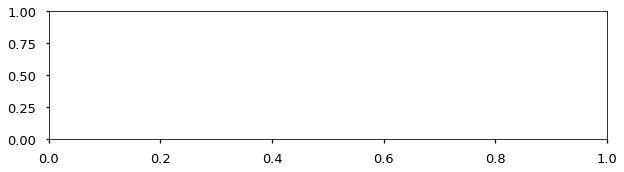

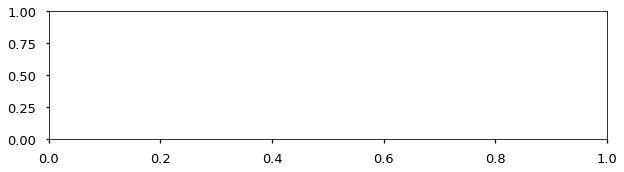

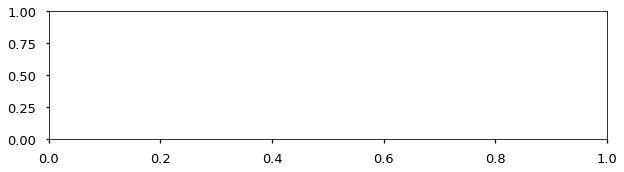

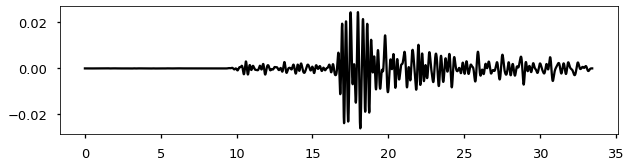

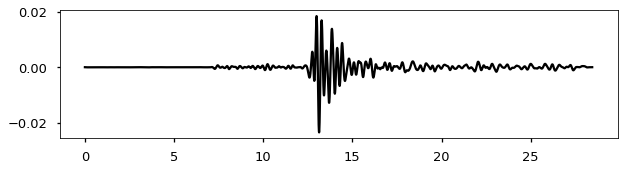

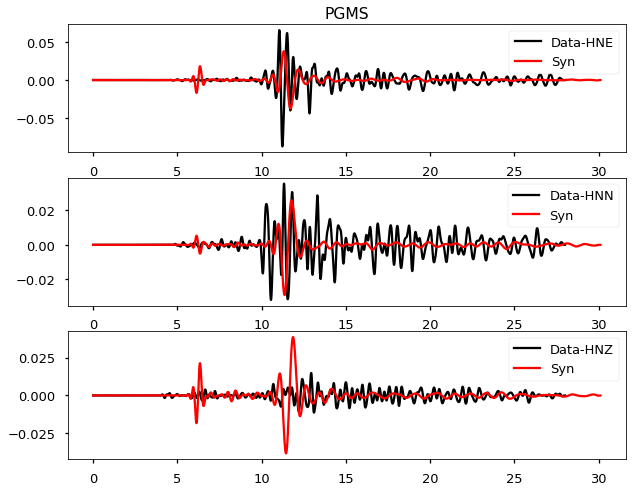

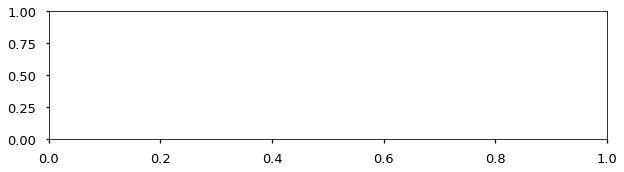

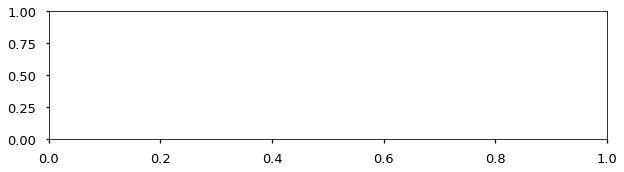

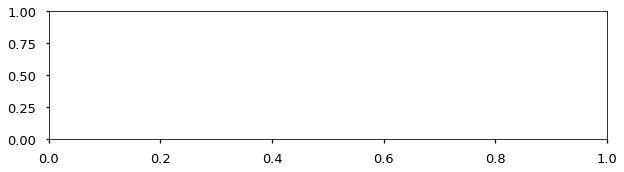

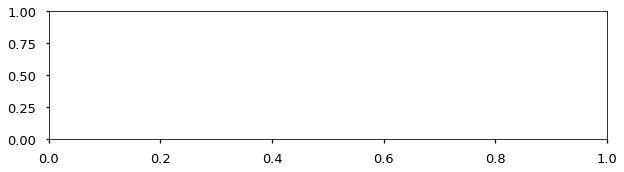

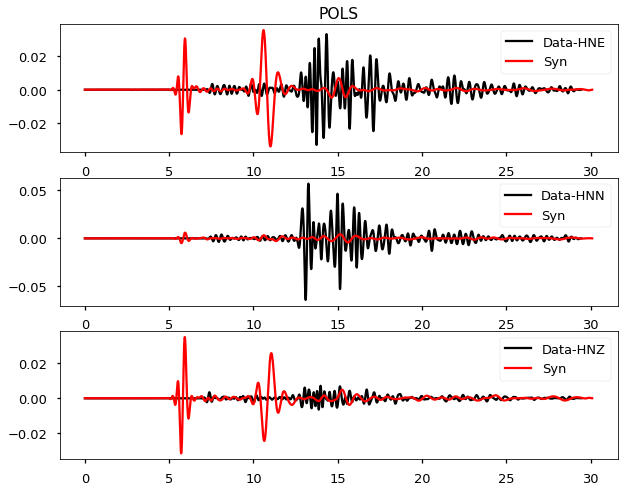

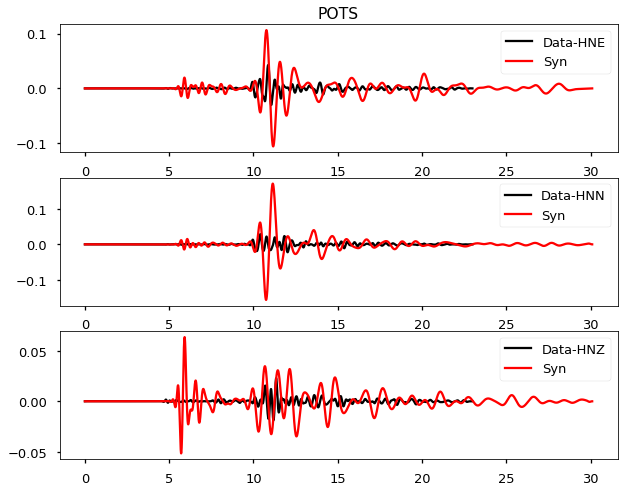

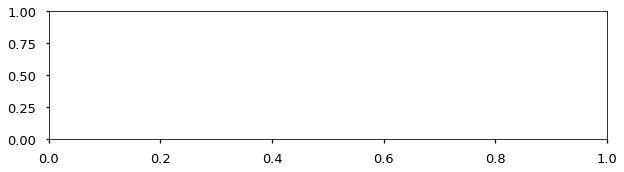

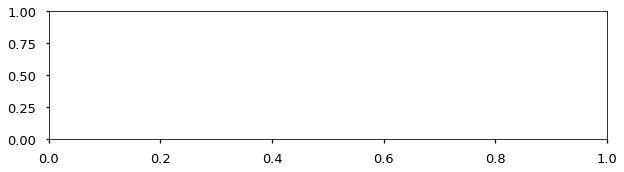

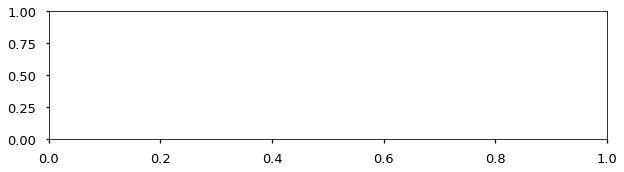

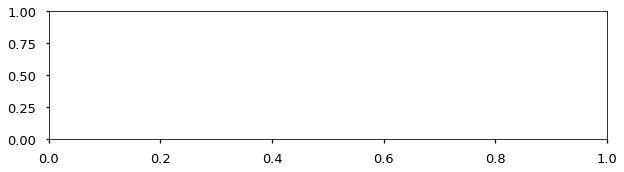

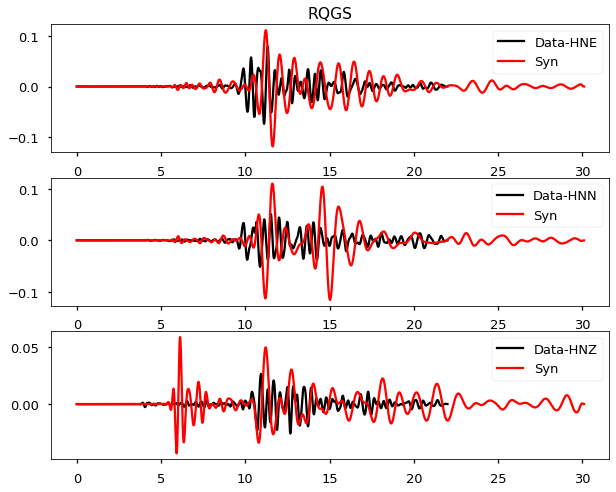

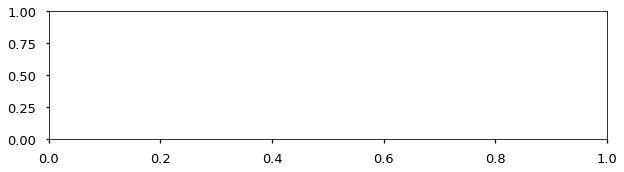

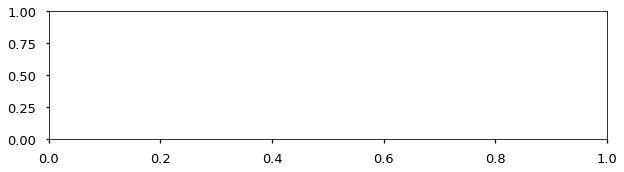

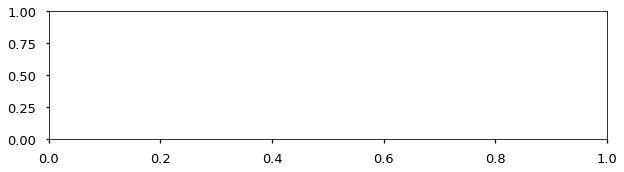

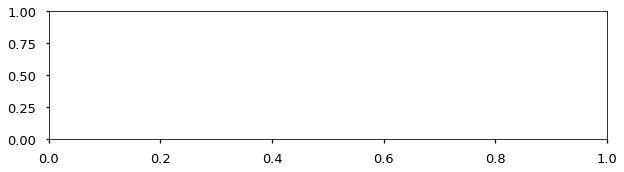

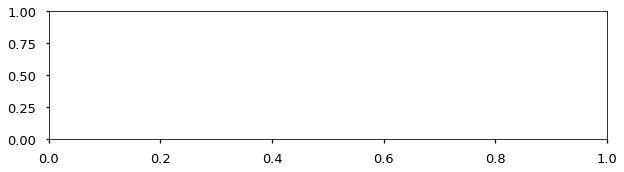

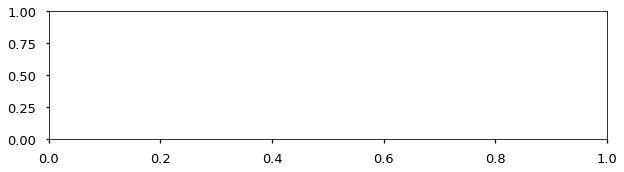

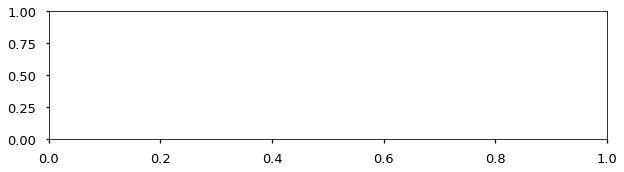

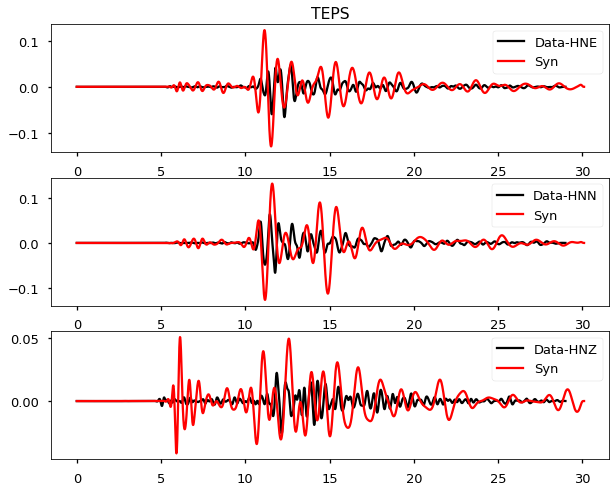

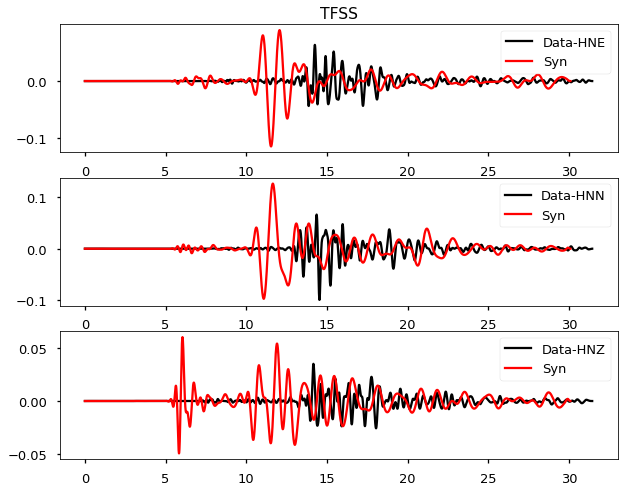

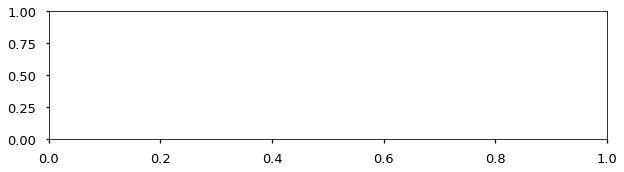

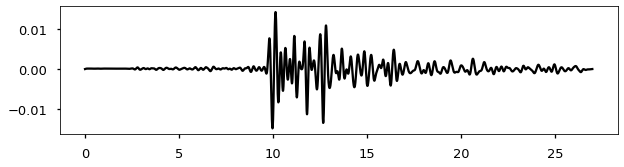

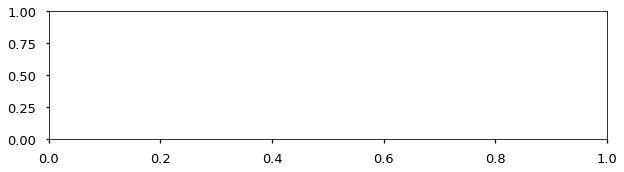

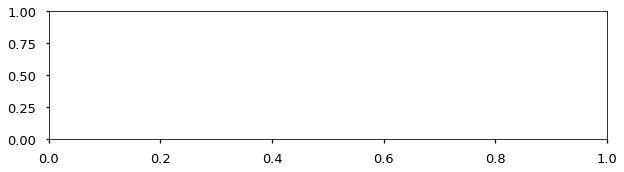

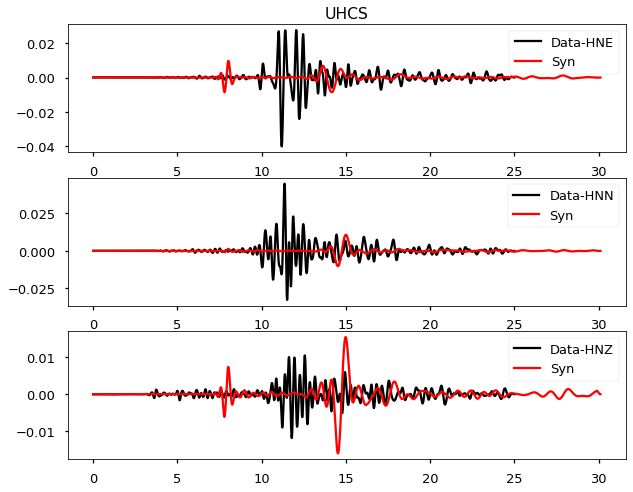

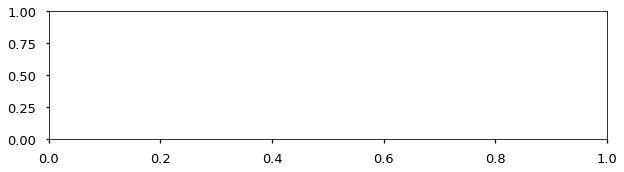

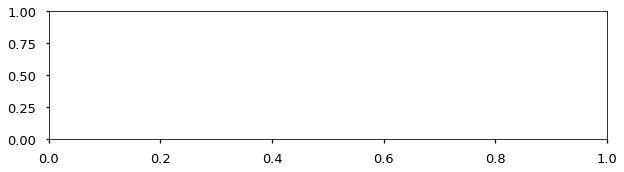

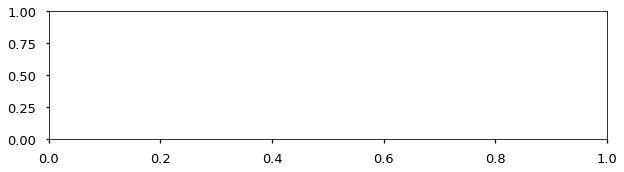

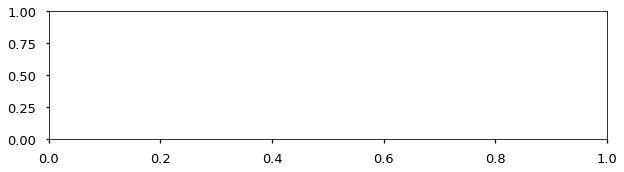

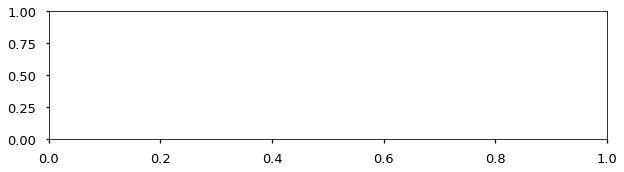

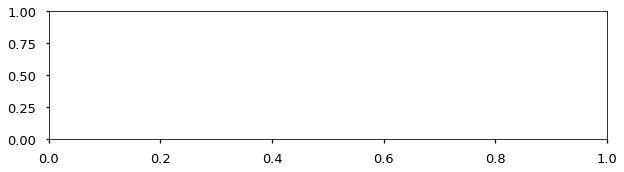

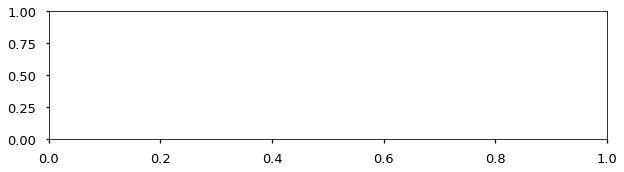

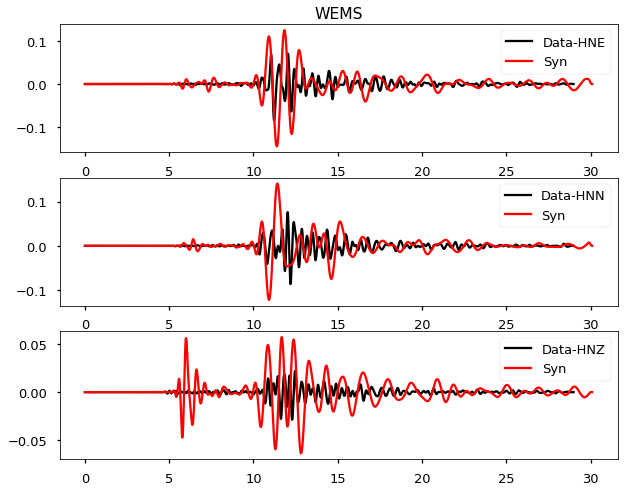

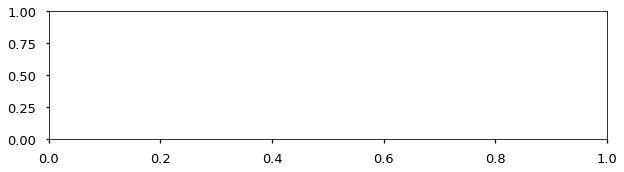

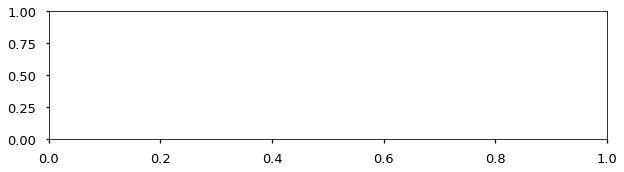

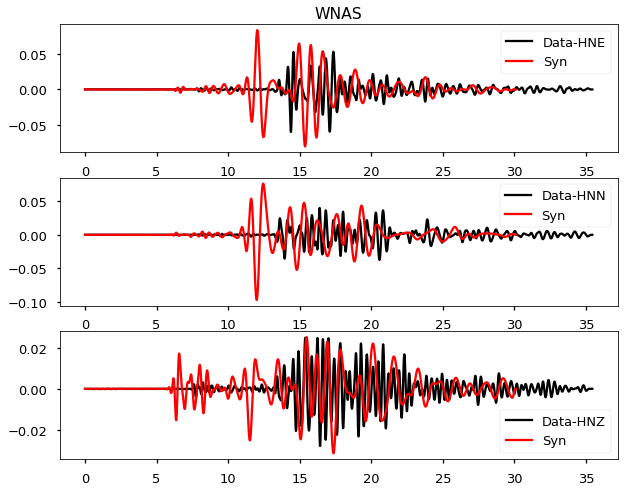

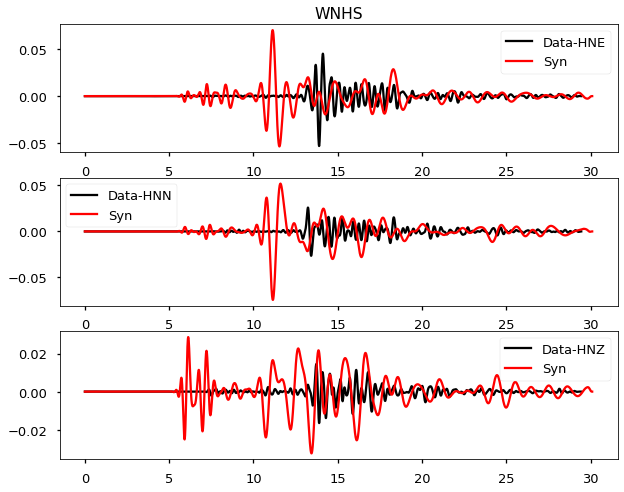

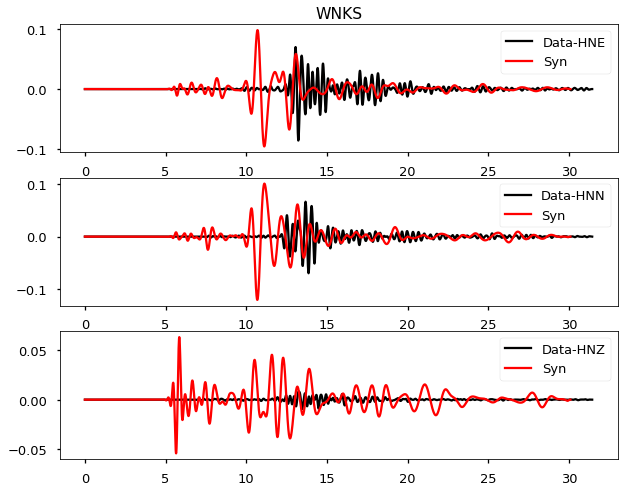

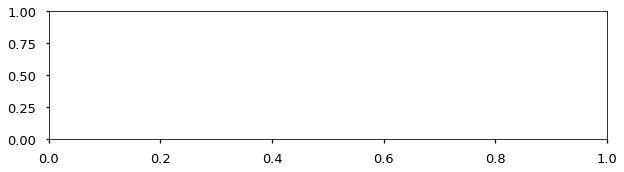

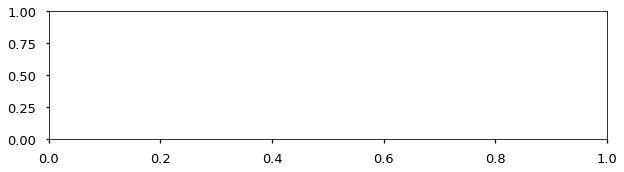

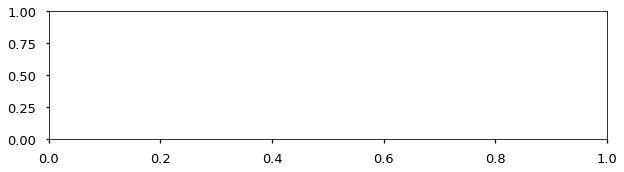

In [41]:
# example
# sta_sele  = 'WNKS'
# st1 = st.select(station=sta_sele)
# st1.remove_response(inventory=inv.select(station=sta_sele),output='vel',plot=True) 
# matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

# num = 0 # Station CHN
# sta = 'WNKS'
# rootfolder = '/Users/duoli/Documents/NSHM_SRM/'

for network in inv:
    for sta in network:
        try:
            plt.figure(figsize=(10, 8))
            
            ax3 = plt.subplot(311)
            ax3.plot(st_data1.select(station=sta.code,channel='HNE')[0].times(),st_data1.select(station=sta.code,channel='HNE')[0].data,'k',label='Data-HNE' )
            ax3.plot(st_syn1.select(station=sta.code,channel='BNE')[0].times(),10*st_syn1.select(station=sta.code,channel='BNE')[0].data,'r',label='Syn' )
            ax3.legend()
            ax3.set_title(sta.code)
            
            ax2 = plt.subplot(312)
            ax2.plot(st_data1.select(station=sta.code,channel='HNN')[0].times(),st_data1.select(station=sta.code,channel='HNN')[0].data,'k',label='Data-HNN' )
            ax2.plot(st_syn1.select(station=sta.code,channel='BNN')[0].times(),10*st_syn1.select(station=sta.code,channel='BNN')[0].data,'r',label='Syn' )
            ax2.legend()
            
            ax1 = plt.subplot(313)
            ax1.plot(st_data1.select(station=sta.code,channel='HNZ')[0].times(),st_data1.select(station=sta.code,channel='HNZ')[0].data,'k',label='Data-HNZ' )
            ax1.plot(st_syn1.select(station=sta.code,channel='BNZ')[0].times(),10*st_syn1.select(station=sta.code,channel='BNZ')[0].data,'r',label='Syn' )
            ax1.legend()
            
            outfolder = rootfolder + '/Model_kinematic/model3/p20091010/'
            fftname = outfolder + './ACC3-4hz-10-'+ sta.code + '.png'  # index change
            
            plt.savefig(fftname,dpi=300)
        except:
            pass


In [48]:
plt.close()

In [49]:
# tranform FFT
# import matplotlib
# matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

# from obspy.signal.invsim import cosine_taper 
# from scipy import fftpack

for network in inv:
    for sta in network:
        try:
            
            freqlist, fas = fourierspec_cal(st_data1.select(station=sta.code,channel='HNZ')[0].data, st_data1.select(station=sta.code,channel='HNZ')[0].stats['delta'])
            freqlist_syn, fas_syn = fourierspec_cal(st_syn1.select(station=sta.code,channel='BNZ')[0].data, st_syn1.select(station=sta.code,channel='BNZ')[0].stats['delta'])
         
            print(sta.code)
            print(freqlist[0],fas[0])


            plt.figure(figsize=(6, 4))

            # freqlist, fas = fourierspec_cal(st_data.select(station=sta.code)[0].data, st_data.select(station=sta.code)[0].stats['delta'])
            # freqlist_syn, fas_syn = fourierspec_cal(st_syn.select(station=sta.code,channel='BNZ')[0].data, st_syn.select(station=sta.code,channel='BNZ')[0].stats['delta'])

            # freqlist, fas = fourierspec_cal(st_data.select(station=sta.code)[0].data, st_data.select(station=sta.code)[0].stats['delta'])
            # freqlist_syn, fas_syn = fourierspec_cal(st_syn.select(station=sta.code,channel='BNZ')[0].data, st_syn.select(station=sta.code,channel='BNZ')[0].stats['delta'])
   
            ax3 = plt.subplot(111)
            ax3.plot(freqlist,fas,'darkgray',label='Data-HNZ' )
            ax3.plot(freqlist_syn,fas_syn,'tomato',label='Syn.' )
            ax3.legend()
            ax3.set_title(sta.code)
            
            ax3.set(xlim=(0,10))
            ax3.set_xlabel('freq (hz)')
            ax3.set_ylabel('FAS')
            ax3.set(xlim=(0.01,10))
            ax3.set_xscale('log',base=10)
            ax3.set_yscale('log',base=10)
            ax3.grid(linestyle=':',which ='both')

            outfolder = rootfolder + '/Model_kinematic/model3/p20120505/'
            fftname = outfolder + './FAS-'+ sta.code + '.png'  # index change
            
            plt.savefig(fftname,dpi=300)
            plt.close()

        except:
            pass



In [31]:
## check synthetic data for comparison with real records

import os.path
from scipy.fft import fft, fftfreq

ch = ['BNE','BNN','BNZ']

# matplotlib.style.use('seabon-v0_8-pastel')

# total site selected = 60
# duration = 50.1

SAMPLE_RATE = 1/0.005 # data sample rate in SeisSol
# N = duration * SAMPLE_RATE
# Nt = int(np.round(N/2,1)-1)
# print(N)


# event 1 p20090827
folder = '/Volumes/AvalonPark3/model2_2hz/lowVel/'
modelname = 'm2low'

folder = '/Volumes/AvalonPark3/model2_2hz/lowD36/'
modelname = 'm2lowD36'

## event2: p20091010

folder = '/Volumes/AvalonPark/model3_2hz/'
modelname = 'm3d15'

folder = '/Volumes/AvalonPark/model4_2hz/'
modelname = 'm4d15'

# event 20120505
folder = rootfolder + '../WelBasin/model2/output/'
modelname = 'm4-4hz'

st_syn = Stream()

for ista in range(61,121):
    ishift = 60

    if ista < 100 :
        filename = folder + modelname + '-receiver-000' + str(ista) + '-00000.dat'
    else:
        filename = folder + modelname + '-receiver-00' + str(ista) + '-00000.dat'

    if os.path.isfile(filename):
        
        t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)

        st = Stream([Trace(vx),Trace(vy),Trace(vz)])    
        
        for tr_num in range(3):
            st[tr_num].stats['sampling_rate'] = SAMPLE_RATE
            st[tr_num].stats['network'] = 'SeisSol'
            st[tr_num].stats['station'] = siteTable.sta[ista-1-ishift] 
            st[tr_num].stats['channel'] = ch[tr_num]
        st_syn += st

    else:
        pass

# filter and band of freq of the synthetic recording


# real recording
# st_data1 = st_data.copy()
# st_data1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)
            

In [32]:
## calculate from Vel to ACC
f1 = 0.01
f2 = 4.0 

st_syn1 = st_syn.copy()
st_syn1.differentiate()

st_syn1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)

# save data to local disc
eventname = '20111207'
# st_data1.write(rootfolder + 'Data/'+'p'+ eventname+  '.mseed', format='MSEED')


print(st_syn)
st_syn1.write(rootfolder + 'Syn/'+'p'+ eventname+  '-4hz.mseed', format='MSEED')

153 Trace(s) in Stream:

SeisSol.ARKS..BNE | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:30.100000Z | 200.0 Hz, 6021 samples
...
(151 other traces)
...
SeisSol.WTYS..BNZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:30.100000Z | 200.0 Hz, 6021 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [ ]:
# real recording
# st_data1 = st_data.copy()
# st_data1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)

# filter and band of freq of the synthetic recording

# f1 = 0.1
# f2 = 2.0 
# st_syn1 = st_syn.copy()
# st_syn1.differentiate() ## important
# st_syn1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)


In [308]:
# check coordinates of stations

# print(st1.spectrogram())
# data = inv.get_coordinates("NZ.LHRS.20.HNZ")
# staTable = pd.DataFrame(index=data.keys())
# print(staTable)

# for network in inv:
#     for station in network:
#         try:
#             name = network.code + '.' + station.code + '.' + str(20) + '.HNZ'
#             # print(inv.get_coordinates(name).values())
#             staTable = staTable.append(data = inv.get_coordinates(name).values(),index=inv.get_coordinates(name).keys())
#             staTable.tail()
#         except:
#             pass

# print(staTable)
# long1 = s

Empty DataFrame
Columns: []
Index: [latitude, longitude, elevation, local_depth]
Empty DataFrame
Columns: []
Index: [latitude, longitude, elevation, local_depth]


### Test: coordinate convert

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from obspy import read_inventory, read_events

# Set up a custom projection
projection = ccrs.AlbersEqualArea(
    central_longitude= 174,
    central_latitude= -41,
    standard_parallels=(-60,-30)
)

# Set up a figure
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection=projection)
ax.set_extent((150., 180., -60., -30.))

# Draw standard features
ax.gridlines()
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.BORDERS)

ax.set_title("Albers Equal Area Projection")

# Now, let's plot some data on the map
inv.plot(fig=fig, show=False)
cat.plot(fig=fig, show=False, title="", colorbar=False)

plt.show()

## Ground Motion visualization

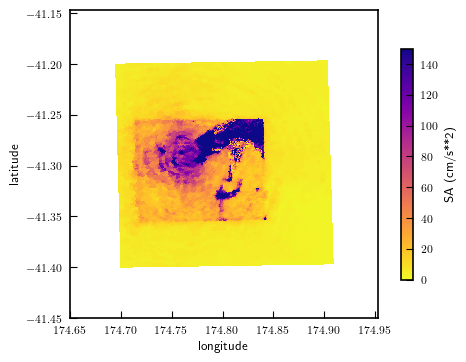

In [143]:
# print(surf[0],surf[1])

min_lat= -41.4
min_long= 174.7
max_lat= -41.197
max_long= 174.903
ext = 0.01


fig,ax2[0] = plt.subplots(nrows=1,ncols=1,figsize=(6,4))

sc = ax2[0].tripcolor(triang,sa2*100,cmap='plasma_r',shading='flat',vmin = 0,vmax = 150)
cl = fig.colorbar(sc,ax=ax2[0],shrink=0.75)
cl.set_label('SA (cm/s**2)')
# ax2[0].plot(coast[0],coast[1],'-k',markersize=0.1)
# ax2[0].plot(siteTable.lon,siteTable.lat,'^w',markersize=5.)

ax2[0].set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))
ax2[0].set_aspect(1)
ax2[0].set_xlabel('longitude')
ax2[0].set_ylabel('latitude')

# sc = ax2[1].tripcolor(triang,pgv*100,cmap='plasma_r',shading='flat',vmin= 0.0,vmax=100)
# cl = fig.colorbar(sc,ax=ax2[1],shrink=0.75)
# cl.set_label('PGV (cm/s)')
# ax2[1].plot(coast[0],coast[1],'-k',markersize=0.1)
# ax2[1].set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))

# ax2[1].set_aspect(1)
# ax2[1].set_xlabel('longitude')
# ax2[1].set_ylabel('latitude')

outname = modelname + '-map-SA2_0.png'
plt.savefig(outname, dpi=150, transparent=False)
plt.show()

In [137]:
# load data
modelname = '5hz'
xdmfFilename = '/Volumes/AvalonPark/GroundMotion/' + modelname + '-GME-surface.xdmf'

pga,pgv,sa1,sa2,sa4,sa8,sa0_5,triang = load_surf_gm(xdmfFilename)


(163243, 3) (392970, 3)


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/w1/_6wbwxqn58j2p6t9v4n73wcr0000gn/T/ipykernel_76679/2578218129.py:26: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)


In [136]:
## load data and plot 

import seissolxdmf
import pyproj
import matplotlib.tri as tri


coastfile ='./Geometry/CoastNorth.txt.npy'
coast =  np.load(coastfile)
# print(coast)

def load_surf_gm(xdmfFilename):
                 
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    
    ndt = sx.ReadNdt()
    surfxyz = sx.ReadGeometry()
    connect = sx.ReadConnect()
    
    print(surfxyz.shape,connect.shape)
    
    # convert  # UTM projection
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')
    
    surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
    
    # print(surf.shape)
    ############# load GMPEs data  ##############
    triang = tri.Triangulation(surf[0],surf[1],connect) # in longitude and latititude
    # triang = tri.Triangulation(surfxyz[:,0],surfxyz[:,1],connect) # in Cartesian xyz coords.
    
    ##%%
    pga = sx.ReadData('PGA')
    pgv = sx.ReadData('PGV')
    sa1 = sx.ReadData('SA01.000s')
    sa2 = sx.ReadData('SA00.500s')
    sa4 = sx.ReadData('SA00.250s')
    sa8 = sx.ReadData('SA00.125s')
    sa0_5 = sx.ReadData('SA02.000s')
    # sa0_2 = sx.ReadData('SA05.0000s')
    
    return pga,pgv,sa1,sa2,sa4,sa8, sa0_5, triang

# print(triang)

# surf = pyproj.transform(myproj, lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
# triang = tri.Triangulation(surf[0],surf[1],connect)


In [ ]:
# plot PGV curve vs. epicentral distance
epi1 = np.array([ 174.75, -41.3, -1.0])

stafolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/'
staIndex  = 'sitemesh_number.txt'

sIndex = np.loadtxt(stafolder+staIndex)
print(sIndex)


In [ ]:
# Basin Edge observations

matplotlib.style.use('seaborn-v0_8-pastel')

# xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
# modelname = 'test3Dv4-5hz'

nsite = 43 # receivers
duration = 30.1

## data around the basin

SAMPLE_RATE = 1/0.005 # data sample rate
N = duration * SAMPLE_RATE
Nt = int(np.round(N/2,1)-1)
print(N)

from scipy.fft import fft, fftfreq


folder = 'Model_kinematic/model2/siteRecord/'
folder = '/Volumes/AvalonPark3/model2_2hz/lowVel/'
modelname = 'm2low'


for ista in range(1,61):

    if ista < 10 :
        filename = folder + modelname + '-receiver-0000' + str(ista) + '-00000.dat'
    else:
        filename = folder + modelname + '-receiver-000' + str(ista) + '-00000.dat'

    
    t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)
    yf1 = fft(vx)
    yf2 = fft(vy)
    yf3 = fft(vz)
    xf = fftfreq(int(N),1/SAMPLE_RATE)
    
    fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
        
    ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='EW')
    ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='NS')
    ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
    ax[0].set(xlim=(0.01,100))
    ax[0].set_xscale('log',base=10)
    ax[0].set_yscale('log',base=10)
    ax[0].set_title('receiver: '+ str(ista)) # index change
        
    # plt.xlim(0,5)
    ax[0].set_ylabel('Spectrum')
    ax[0].set_xlabel('freq (hz)')
    
    ax[0].legend()
    
    ax[1].plot(t,vx,'-',color='seagreen',label='EW')
    ax[1].plot(t,vy,'-',color='royalblue',label='NS')
    ax[1].plot(t,vz,'-',color='tomato',label='Z')
    
    ax[1].set(xlim=(0,30),ylim=(-0.1,0.1))
    ax[1].set_ylabel('velocity (m/s)')
    ax[1].set_xlabel('tims (s)')


    # ax[1].legend()
    outfolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/WelBasinRec/test3Dv2-2hz/'
    fftname = outfolder + './Topo-WF-'+ str(sta) + '.png'  # index change
    plt.savefig(fftname,dpi=150)


In [173]:
# load topographic data
from load_topo_data import load_topo_data

ncfile = '/Users/duoli/Documents/NSHM_SRM/Geometry/NZ_gebco_03s.grd'
# ncfile = '../Geometry/NZ_gebco_01s.grd'

topo, xrange,yrange = load_topo_data(ncfile)
print(topo.shape,xrange.shape)

(1746511.3065337986, 5426462.244420674)
(246, 246) (246,)


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/duoli/Documents/PythonPath/load_topo_data2.py:41: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xyz_map = pyproj.transform(lla, myproj, x_lon,y_lat,np.zeros(len(x_lon)), radians=False)
/Users/duoli/Documents/PythonPath/load_topo_data2.py:49: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xyz_sou = pyproj.transform(lla, myproj, lon_sou,lat_sou, radians=False) # Epicenter in UTM domain


In [176]:
from FigFunc.load_vel_csv import load_vel_csv

In [178]:
csvfile = './basin_structure/WGTN3D_v5_VsModel_density.csv'

Nx = 40
Nz = 129

grdx,grdy,grdz, grdvel,grdrho = load_vel_csv(csvfile,Nx,Nz)

print(grdvel.shape, grdy.shape,grdz.shape)
print(grdvel.min(),grdrho.min())

Index(['X', 'Y', 'Z', 'WGTN3D_v5', 'GSURFDIST', 'Vs_CALC', 'Vs_BLOCK',
       'DENSITY'],
      dtype='object')
129 215 224
(129, 40, 40) (40,) (129,)
0.0 1.0


In [30]:
# code from Sanjay; uniformly process data

def fourierspec_cal(data, dtsamp):
    ''' Gives the Fourier amplitude spectrum of a input signal.
    Parameters
    -----------------------
    data: array like
        input time signal
    dtsamp :
        sampling interval

    Returns
    freqlist: array like
        The positive signal frequencies
    fas : array like
        Positive frequency side FAS.'''
    n = len(data)
    taper = cosine_taper(n)
    sign_tap = taper*data # Tapered signal
    fft = dtsamp*fftpack.fft(sign_tap) # See the documentation of scipy.fftpack
    # Multiplication with sampling period makes it equivalent to continous Fourier transform. See Mathematica code of
    # Frank Scherbaum and fourierspec_Cal.
    freqlist = fftpack.fftfreq(n, dtsamp)
    freqs_mask = (freqlist >= 0)
    freqlist = freqlist[freqs_mask]
    fas = np.abs(fft)
    fas = fas[freqs_mask]
    return freqlist, fas

In [31]:
def sdof_response(dat, dtsamp, fosc, dampfac=0.05):
    '''This gives the single degree of freedom oscillator response for acceleration motion.

    Parameters
    --------------------
    dat: array like
    the input acceleration data without the time samples
    dtsamp: float
    the sampling interval of the time series.
    fosc: float
    The natural frequency of the SDOF oscillator at which the response is desired.
    dampfac: float
    damping of the SDOF oscillator, its optional default is the usual 0.05.

    Returns
    ----------------------
    sa: float
    the absolute spectral amplitude or the maximum of the response motion
    times: array
    the time samples for the response motion same as for the input motion
    resp : array
    the full response motion of acceleration
    '''
    # See the mathematica version in Response Spectrum and for algorithm see the book in German.
    omegaosc = 2 * np.pi * fosc
    lamda = -dampfac * omegaosc + 1j * omegaosc * np.sqrt(1 - dampfac ** 2)
    c1 = np.exp(lamda * dtsamp)
    c2 = 2 * (1 - c1) / ((lamda - np.conj(lamda)) * dtsamp)
    y0 = 2 * lamda * (-dat[0]) / (lamda - np.conj(lamda))
    deltaai = dat[1:] - dat[:-1]     # the linear approximation of acceleration between adjacent samples.
    yi = y0
    resp = np.empty(len(dat))
    resp[0] = np.real(yi)
    for i, deltaa in enumerate(deltaai, 1):
        yi = c1 * yi + c2 * deltaa
        resp[i] = np.real(yi)        # first resp is relative motion
    resp = resp + dat                # Finally I compute total absolute movement by adding resp with input acceleration
    sa = max(np.abs(resp))
    times = np.arange(0, len(dat) * dtsamp, dtsamp, dtype=float)
    return sa, times, resp